In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import warnings

# Uyarıları kapat
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [100]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [101]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [102]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='serum_sodium', ylabel='age'>

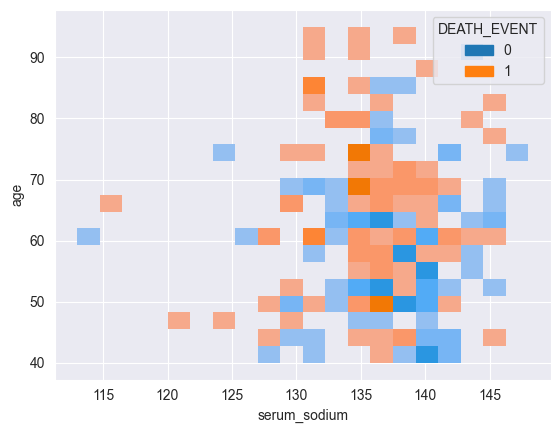

In [103]:
sns.histplot(data=df, x='serum_sodium', y='age', hue="DEATH_EVENT", bins=20)

<Axes: xlabel='creatinine_phosphokinase', ylabel='age'>

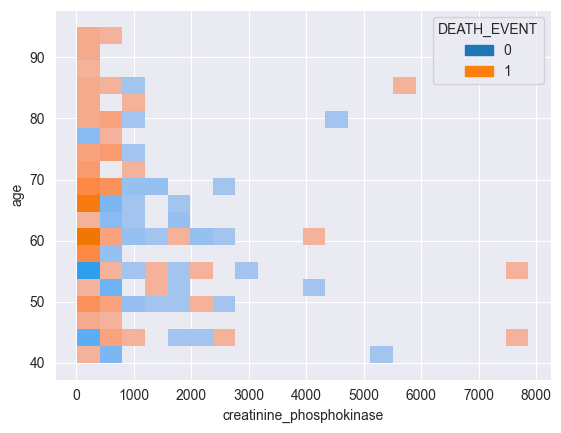

In [104]:
sns.histplot(data=df, x='creatinine_phosphokinase', y='age', hue="DEATH_EVENT", bins=20)

<Axes: xlabel='serum_creatinine', ylabel='age'>

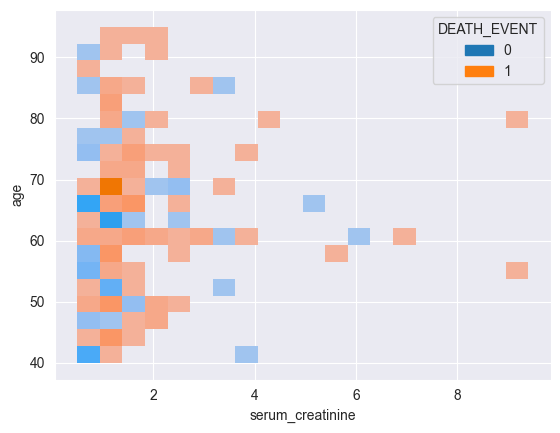

In [105]:
sns.histplot(data=df, x='serum_creatinine', y='age', hue="DEATH_EVENT", bins=20)

<Axes: xlabel='sex', ylabel='age'>

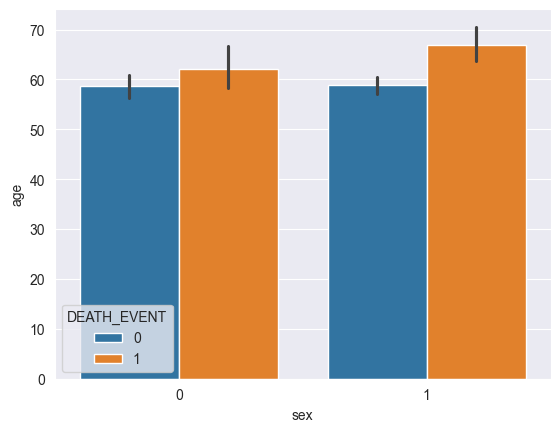

In [106]:
sns.barplot(data=df, x='sex', y='age', hue="DEATH_EVENT",)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, '40.0'),
  Text(1, 0, '41.0'),
  Text(2, 0, '42.0'),
  Text(3, 0, '43.0'),
  Text(4, 0, '44.0'),
  Text(5, 0, '45.0'),
  Text(6, 0, '46.0'),
  Text(7, 0, '47.0'),
  Text(8, 0, '48.0'),
  Text(9, 0, '49.0'),
  Text(10, 0, '50.0'),
  Text(11, 0, '51.0'),
  Text(12, 0, '52.0'),
  Text(13, 0, '53.0'),
  Text(14, 0, '54.0'),
  Text(15, 0, '55.0'),
  Text(16, 0, '56.0'),
  Text(17, 0, '57.0'),
  Text(18, 0, '58.0'),
  Text(19, 0, '59.0'),
  Text(20, 0, '60.0'),
  Text(21, 0, '60.667'),
  Text(22, 0, '61.0'),
  Text(23, 0, '62.0'),
  Text(24, 0, '63.0'),
  Text(25, 0, '64.0'),
  Text(26, 0, '65.0'),
  Text(27, 0, '66.0'),
  Text(28, 0, '67.0'),
  Text(29, 0, '68.0'),
  Text(30, 0, '69.0'),
  Text(31, 0, '70.0'),

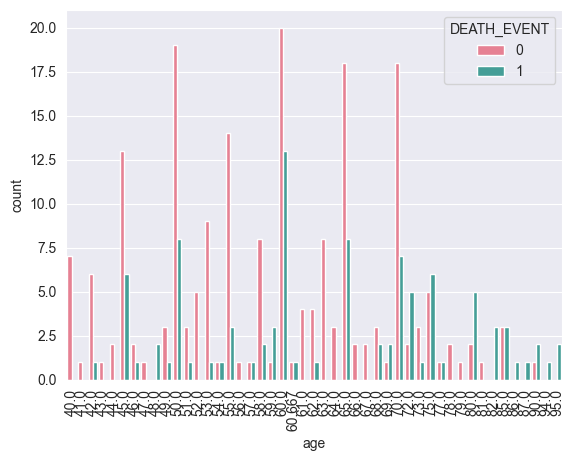

In [107]:
sns.countplot(data=df, x='age',  hue="DEATH_EVENT", palette="husl")
plt.xticks(rotation=90)

In [108]:

bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

death_counts = df[df['DEATH_EVENT'] == 1]['age_group'].value_counts().sort_index()

fig = px.bar(death_counts, x=death_counts.index, y=death_counts.values, labels={'x': 'Age Group', 'y': 'Death Count'}, title='Death Count by Age Group')
fig.show()

In [109]:
df = df[df['age'] > 40]

# Yaş gruplarını oluştur
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Yaş gruplarına göre ve cinsiyete göre ölüm olaylarını say
death_counts = df[df['DEATH_EVENT'] == 1].groupby(['age_group', 'sex']).size().reset_index(name='count')

# Görselleştir
fig = px.bar(death_counts, x='age_group', y='count', color='sex', barmode='group', labels={'age_group': 'Age Group', 'count': 'Death Count', 'sex': 'Sex'}, title='Death Count by Age Group and Sex')
fig.show()

<Axes: xlabel='age', ylabel='sex'>

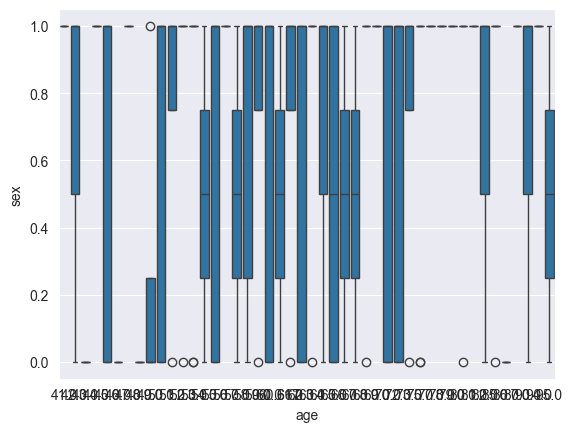

In [110]:
sns.boxplot(x='age', y='sex', data=df)

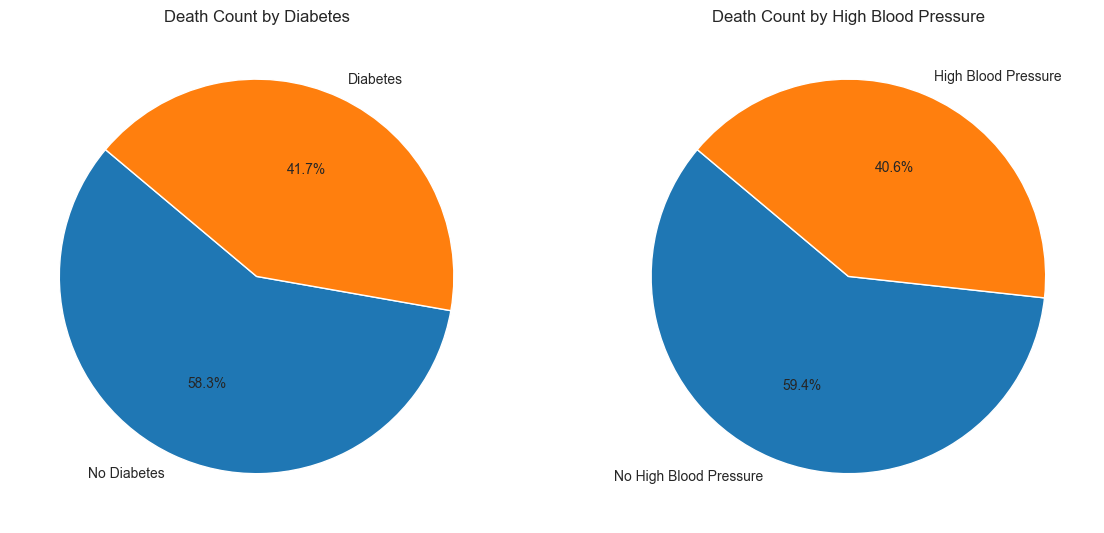

In [111]:

# Yaş gruplarına göre ve diğer özelliklere göre ölüm olaylarını say
death_counts_diabetes = df[df['DEATH_EVENT'] == 1].groupby('diabetes').size().reset_index(name='count')
death_counts_hbp = df[df['DEATH_EVENT'] == 1].groupby('high_blood_pressure').size().reset_index(name='count')

# Pasta grafiği oluştur
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Diabetes için pasta grafiği
diabetes_labels = {0: 'No Diabetes', 1: 'Diabetes'}
death_counts_diabetes['diabetes'] = death_counts_diabetes['diabetes'].map(diabetes_labels)
axs[0].pie(death_counts_diabetes['count'], labels=death_counts_diabetes['diabetes'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Death Count by Diabetes')

# High Blood Pressure için pasta grafiği
hbp_labels = {0: 'No High Blood Pressure', 1: 'High Blood Pressure'}
death_counts_hbp['high_blood_pressure'] = death_counts_hbp['high_blood_pressure'].map(hbp_labels)
axs[1].pie(death_counts_hbp['count'], labels=death_counts_hbp['high_blood_pressure'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Death Count by High Blood Pressure')

plt.show()

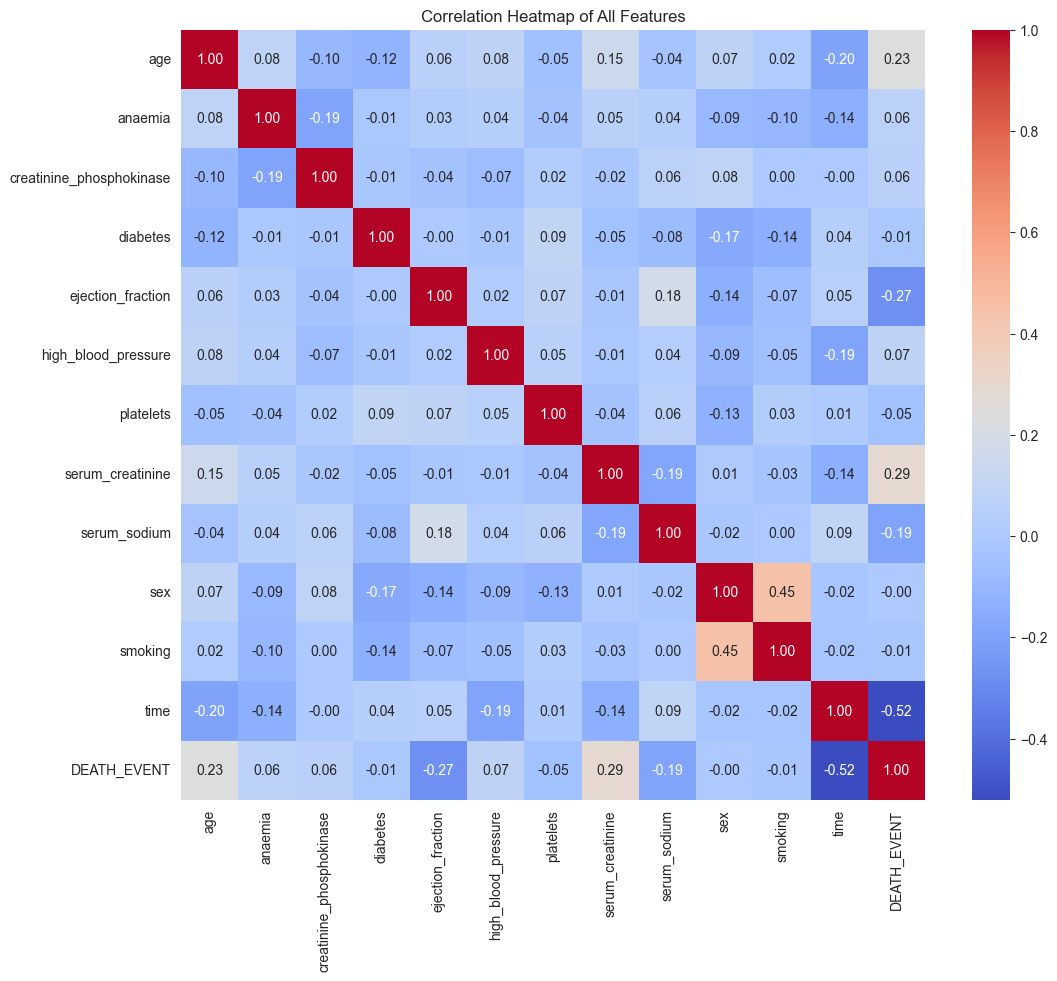

In [112]:
df = df.drop(columns=['age_group'], errors='ignore')

# Korelasyon matrisini hesapla
corr_matrix = df.corr()

# Isı haritası oluştur
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

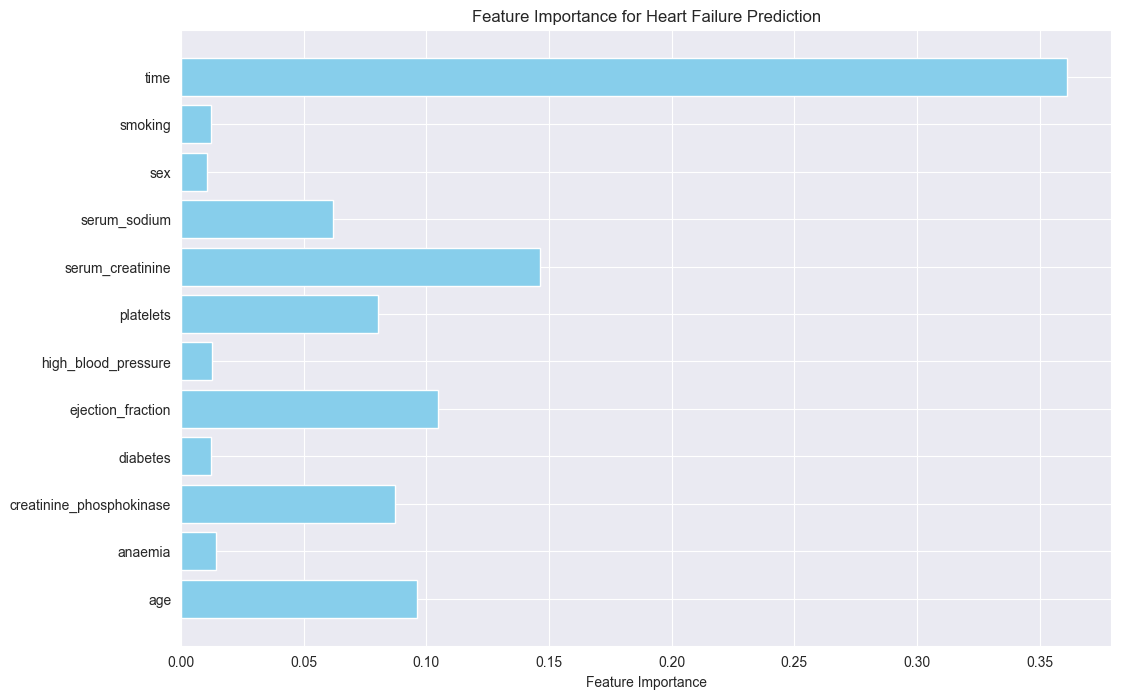

In [114]:

# Özellikler ve hedef değişkeni ayır
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Özellik önemlerini al
feature_importances = model.feature_importances_

# Özellik isimlerini al
features = X.columns

# Özellik önemlerini görselleştir
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Heart Failure Prediction')
plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler

# Özellikler ve hedef değişkeni ayır
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Özellikleri ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [117]:

# Random Forest modelini oluştur ve eği
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.78
Precision: 0.79
Recall: 0.62
F1 Score: 0.70
ROC AUC: 0.90


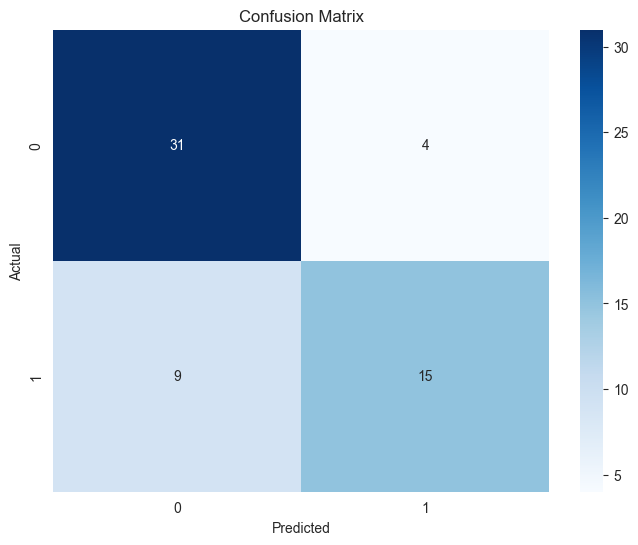

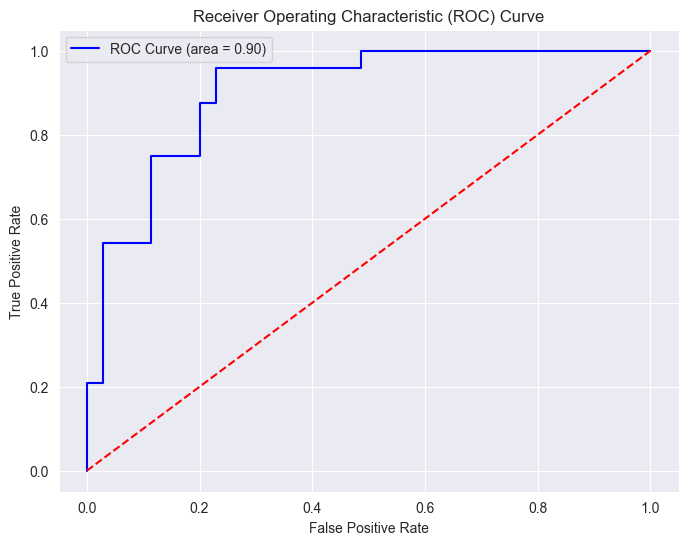

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Değerlendirme metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Sonuçları yazdır
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

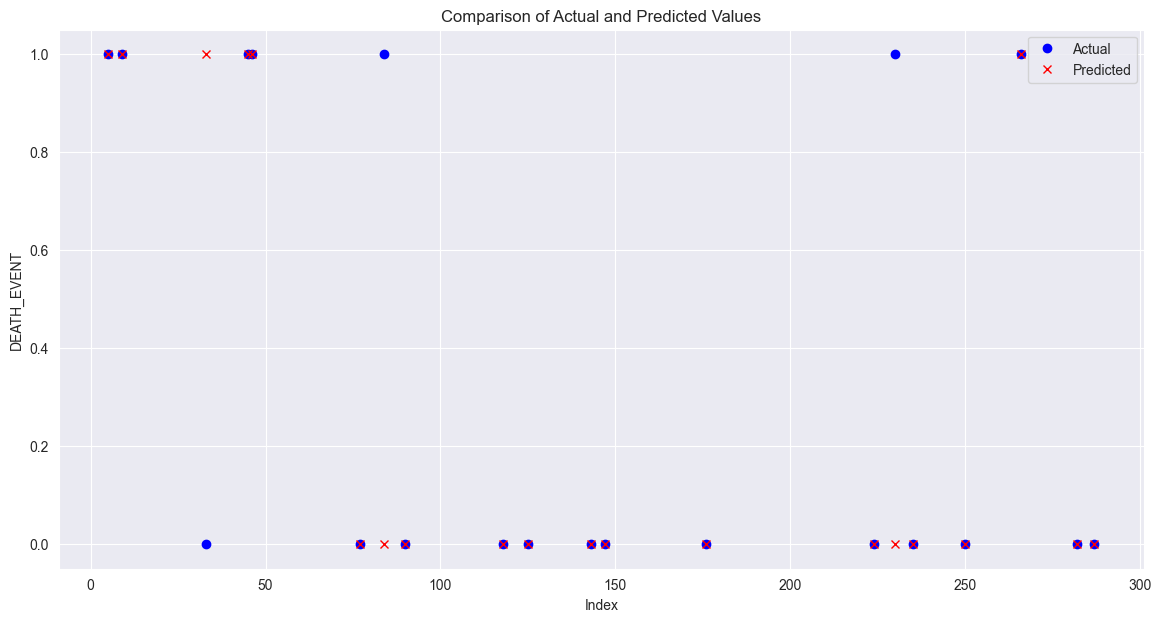

In [119]:
y_pred = model.predict(X_test)

# Tahmin edilen ve gerçek değerleri bir DataFrame'e koy
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# İlk 20 örneği görselleştir
results_sample = results.head(20)

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results_sample.index, results_sample['Actual'], marker='o', linestyle='', color='blue', label='Actual')
plt.plot(results_sample.index, results_sample['Predicted'], marker='x', linestyle='', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('DEATH_EVENT')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

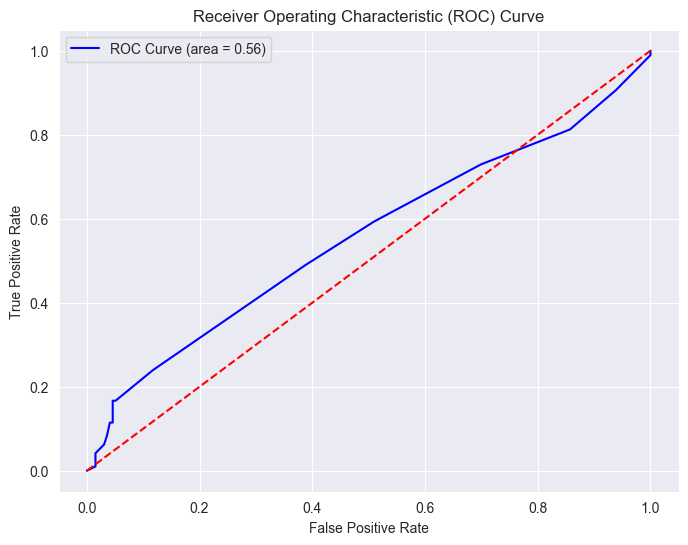

In [120]:
y_pred_proba_all = model.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba_all)
roc_auc = roc_auc_score(y, y_pred_proba_all)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [121]:
# Tüm veri seti üzerinde tahmin yap
y_pred_all = model.predict(X_scaled)

# Tahmin edilen ve gerçek değerleri bir DataFrame'e koy
results_all = pd.DataFrame({'Actual': y, 'Predicted': y_pred_all})

In [122]:
# Yeni bir veri noktası için tahmin yapma
new_data = [[75, 1, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0, 4]]  # Örnek veri
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)[:, 1]

print(f'Tahmin: {"Ölüm" if prediction[0] == 1 else "Hayatta Kalma"}')
print(f'Tahmin Olasılığı: {prediction_proba[0]:.2f}')

Tahmin: Ölüm
Tahmin Olasılığı: 0.58
